### Les séries temporelles

In [3]:
# Une série temporelle est une série dont l'index est le temps

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
energy = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

In [5]:
energy

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [5]:
energy.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [8]:
energy['Wind'].isna().any() # any() qui renvoie true si y a une valeur manquante

True

In [9]:
energy['Date'] = pd.to_datetime(energy['Date'])

In [10]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [11]:
energy = energy.set_index('Date')
energy

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [12]:
energy.isnull().any()

Consumption    False
Wind            True
Solar           True
Wind+Solar      True
dtype: bool

In [13]:
energy.isnull().mean() * 100   # La proportion de valeur manquante par colonne

Consumption     0.000000
Wind           33.378964
Solar          50.079854
Wind+Solar     50.102669
dtype: float64

In [14]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [16]:
energy.index[:5].year # month, day, day_name()

Int64Index([2006, 2006, 2006, 2006, 2006], dtype='int64', name='Date')

In [17]:
energy['year'] = energy.index.year

In [18]:
energy['month'] = energy.index.month

In [19]:
energy['day_name'] = energy.index.day_name()
energy

,Consumption,Wind,Solar,Wind+Solar,year,month,day_name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [20]:
#energy['weekend'] = ((energy['day_name'] == 'Sunday') | (energy['day_name'] == 'Saturday')) la parenthèse est importante
energy['weekend'] = energy['day_name'].isin(['Sunday', 'Saturday'])
energy

,Consumption,Wind,Solar,Wind+Solar,year,month,day_name,weekend
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,False
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,False


In [22]:
energy['year'].max()

2017

In [24]:
energy.loc["2010-05":"2013-08"]

,Consumption,Wind,Solar,Wind+Solar,year,month,day_name,weekend
Date,,,,,,,,
2010-05-01,1003.133,71.799,NaN,NaN,2010,5,Saturday,True
2010-05-02,1025.534,38.272,NaN,NaN,2010,5,Sunday,True
2010-05-03,1357.760,42.253,NaN,NaN,2010,5,Monday,False
2010-05-04,1380.307,97.348,NaN,NaN,2010,5,Tuesday,False
2010-05-05,1377.111,94.939,NaN,NaN,2010,5,Wednesday,False
...,...,...,...,...,...,...,...,...
2013-08-27,1306.896,60.838,95.038,155.876,2013,8,Tuesday,False
2013-08-28,1295.979,21.264,112.823,134.087,2013,8,Wednesday,False
2013-08-29,1285.918,11.641,148.324,159.965,2013,8,Thursday,False


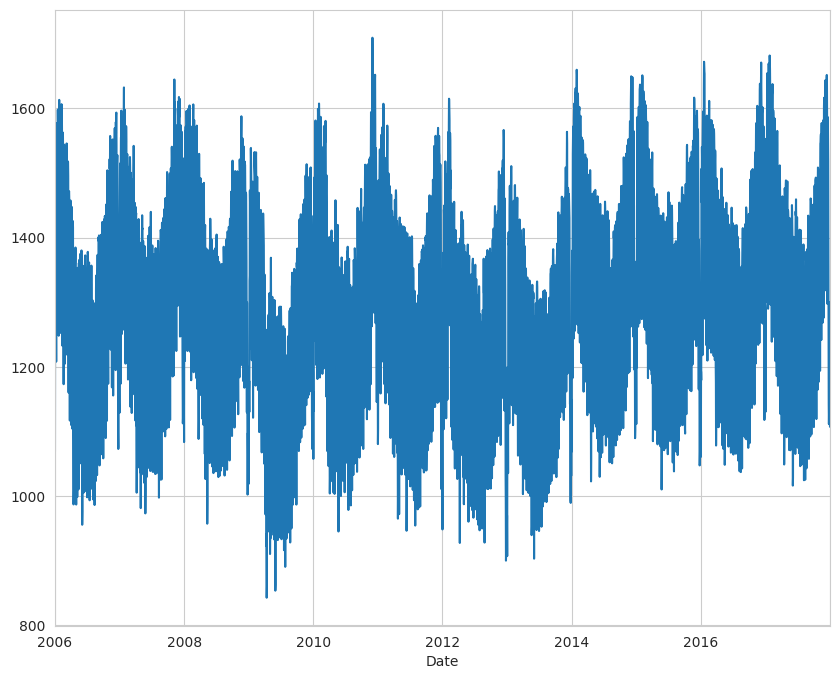

In [29]:
sns.set_style("whitegrid")
energy["Consumption"].plot(figsize=(10, 8)) # linewhidth=.5 ne marche pas
plt.show()

In [35]:
# energy.groupby("day_name").groups
energy.groupby("day_name").sum()

,Consumption,Wind,Solar,Wind+Solar,year,month,weekend
day_name,,,,,,,
Friday,873034.67157,67195.390,28035.810,83131.425,1259202,4081,0
Monday,870006.24492,67131.668,28211.238,85333.933,1259195,4082,0
Saturday,751544.19949,70724.544,27360.623,85230.882,1259203,4089,626
Sunday,691646.51735,71909.961,27662.976,88529.003,1261211,4087,627
Thursday,889645.06681,68903.054,28529.677,85806.246,1259200,4084,0
Tuesday,894101.79246,66726.847,27558.333,82926.441,1259197,4079,0
Wednesday,897437.69479,68665.920,27939.367,85357.104,1259198,4088,0


In [38]:
energy.groupby("day_name").sum()["Consumption"].sort_values()

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

In [41]:
energy.groupby("day_name").sum()["Consumption"].sort_values()

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

In [42]:
groupDay = energy.groupby("day_name").sum()["Consumption"].reset_index()
groupDay

,day_name,Consumption
0,Friday,873034.67157
1,Monday,870006.24492
2,Saturday,751544.19949
3,Sunday,691646.51735
4,Thursday,889645.06681
5,Tuesday,894101.79246
6,Wednesday,897437.69479


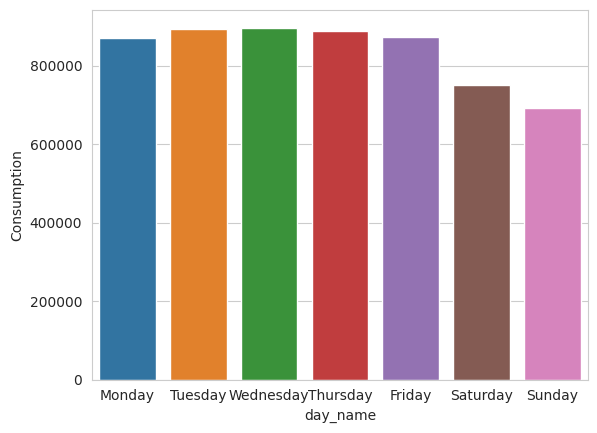

In [43]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(x = groupDay["day_name"], y = groupDay["Consumption"], order=order)
plt.show()

#### Visualisation par année

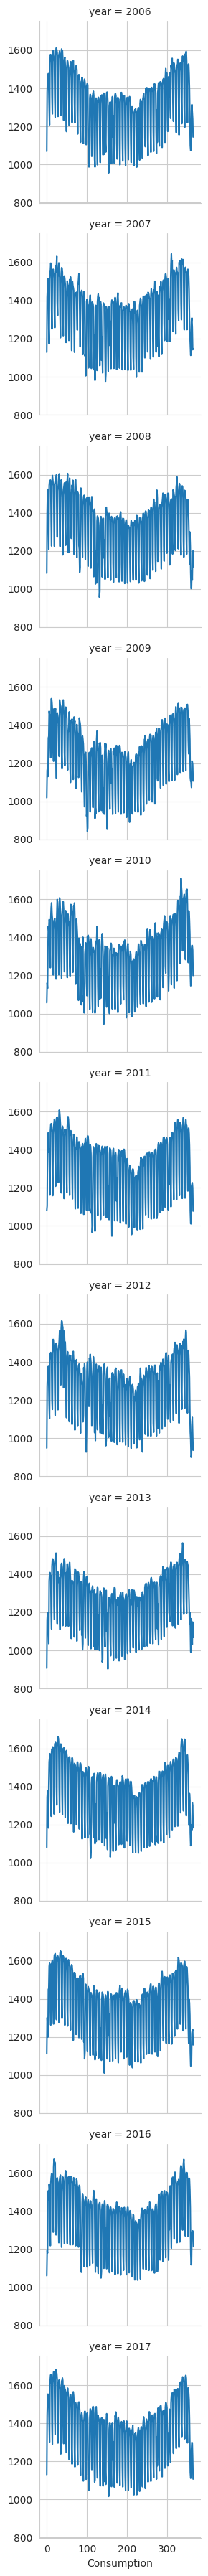

In [44]:
grid = sns.FacetGrid(energy, row="year")
grid.map(plt.plot, "Consumption")

In [47]:
data = energy.loc["2016"].copy()
data

,Consumption,Wind,Solar,Wind+Solar,year,month,day_name,weekend
Date,,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,Friday,False
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,Saturday,True
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,Sunday,True
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,Monday,False
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,Tuesday,False
...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,Thursday,False


(16801.0, 17166.0)

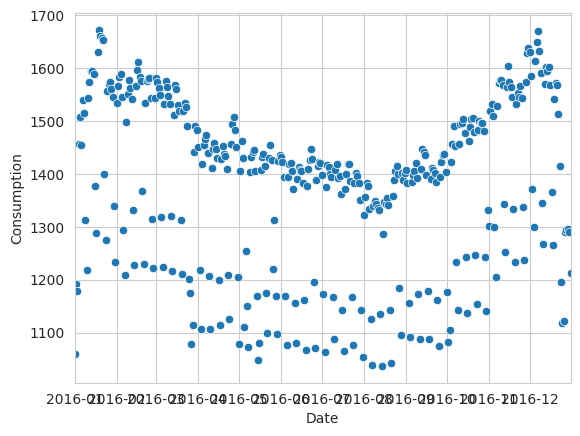

In [49]:
sns.scatterplot( x = data.index, y=data["Consumption"])
plt.xlim(data.index.min(), data.index.max())

In [50]:
# La suite des graphe à Ctrl CV sur son github

#### Resampling (pourvoir grouper les données par semaine, mois, trimestre etc...)

In [51]:
# Consormation par semaine
energy.drop(["year", "month", "weekend", "day_name"], axis=1).resample("W").mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [52]:
# Consormation par mois
energy.drop(["year", "month", "weekend", "day_name"], axis=1).resample("M").mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


In [53]:
# Consormation par trimestre
energy.drop(["year", "month", "weekend", "day_name"], axis=1).resample("Q").mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-03-31,1448.464678,NaN,NaN,NaN
2006-06-30,1256.740220,NaN,NaN,NaN
2006-09-30,1268.088424,NaN,NaN,NaN
2006-12-31,1387.817609,NaN,NaN,NaN
2007-03-31,1434.139633,NaN,NaN,NaN
2007-06-30,1278.652451,NaN,NaN,NaN
2007-09-30,1304.044261,NaN,NaN,NaN
2007-12-31,1426.411250,NaN,NaN,NaN
2008-03-31,1445.339879,NaN,NaN,NaN
